# 탐색적분석(EDA) 실습_타이타닉

In [1]:
import pandas as pd

import numpy as np

import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns

#가설검정 및 통계분석

from scipy import stats

from statsmodels.formula.api import ols

#선형모델 formula

import statsmodels.formula.api as smf

import statsmodels.api as sm

 

from statsmodels.stats.proportion import proportions_ztest

from statsmodels.stats.anova import anova_lm

import scipy.stats

from scipy.stats import chi2_contingency 

from statsmodels.formula.api import ols

from statsmodels.stats.anova import anova_lm

#qqplot, 상수항 추가

from statsmodels.api import qqplot, add_constant

#선형모델 formula

import statsmodels.formula.api as smf

from statsmodels.stats.stattools import omni_normtest 

 

%matplotlib inline

In [2]:
matplotlib.rc("font",family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus']=False

## 파일 불러오고, 기술 통계량 확인하기

- 먼저 파일을 불러오고 기술통계량과 정보를 통해 통계량 그리고 데이터 타입을 확인하였다.

#### 분석목표 : 생존율에 영향을 미치는 영향인자 도출

- Passengerid : 탑승자 데이터 일련번호
- survived : 생존 여부, 0 = 사망, 1 = 생존
- pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
- sex : 탑승자 성별
- name : 탑승자 이름
- age : 탑승자 나이
- SibSp : 같이 탑승한 형제 또는 배우자 인원수
- Parch : 같이 탑승한 부모, 자녀 인원수
- Ticket : 티켓 번호
- Fare: 티켓 요금(파운드)
- Cabin : 객실 번호
- Embarked : 승객이 탑승한 곳(중간 정착 항구)


#### 분석을 위한 가설 설정
- 가설 1. 성별에 따라 생존율에 영향을 줄 것이다.
- 가설 2. 나이에 따라 생존율에 영향을 줄 것이다.
- 가설 3. 선실 등급별로 생존율에 영향을 줄 것이다.
- 가설 4. 객실에 따라 생존율에 영향을 줄 것이다.
- 가설 5. 정착지에 따라 생존율에 영향을 줄 것이다.

In [3]:
#파일 불러오기
df = pd.read_csv("./datasets/titanic.csv",engine="python",encoding='utf-8')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#파일 기술통계량 
df.describe()
# 승객은 총 891명,승객들의 생존률은 평균 38.3%, 탑승 평균 승객 나이는 29.7살, 함께 탑승한 형제,배우자 수는 ,,

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 해당 데이터에 대한 정보
df.info()
# 승객 아이디, 생존여부, 승객등급, 나이, 함께탑승수, 티켓비용 : int,float인 숫자형 / 이름, 성별, 티켓종류, 객실번호, 승객이 탑승한 위치 : object인 문자형으로이루어져있음
# 다른 열 항목과 다르게 Cabin과 Embarked의 행 개수가 891보다 작은 것으로 보아 결측치가 존재함을 짐작할 수 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 처리와 데이터 정제

- RangeIndex 를 통해 891 개의 로우 구성 확인
- age, cabin, embarked 칼럼은 각각 714개, 204개, 889개 not null 값을 통해 각 177, 608, 2 개의 null 값이 있다는 것을 확인
- sklearn ML 알고리즘은 null 값을 허용하지 않으므로 결측치 처리가 필수적임

- age의 경우 결측값은 평균 나이, cabin, embarked 칼럼 결측값은 'N'으로 변경

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 개수 \n', df.isnull().sum().sum())

데이터 세트 Null 개수 
 0


In [7]:
print('Sex 값 분포 :\n', df['Sex'].value_counts())
print('Pclass 값 분포 :\n', df['Pclass'].value_counts())
print('\n Cabin 값 분포 :\n', df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', df['Embarked'].value_counts())

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64
Pclass 값 분포 :
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


### 분포도 확인결과
- cabin 의 경우, 속성값 정리를 위해 선실 등급을 의미하는 앞 문자만 추출하는 데이터 가공을 거침
- sex(성별),pclass(선실 등급), cabin(객실), embarked(정착지) 종류에 대한 분포 확인

In [8]:
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].value_counts())

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


In [9]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

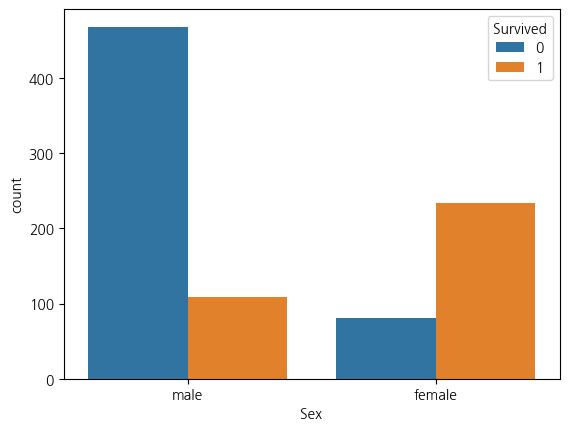

In [10]:
sns.countplot(x='Sex',hue='Survived', data=df)

In [11]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

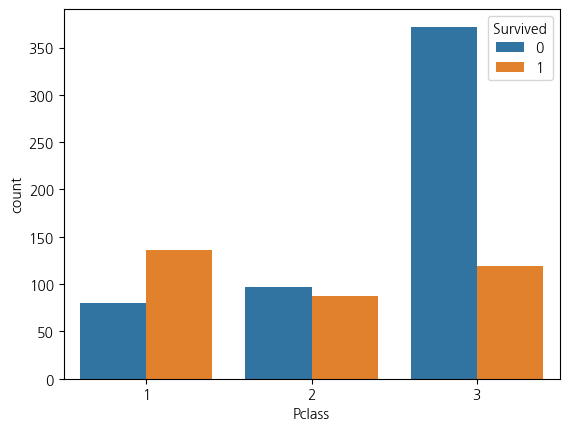

In [12]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [13]:
df.groupby(['Cabin','Survived'])['Survived'].count()

Cabin  Survived
A      0             8
       1             7
B      0            12
       1            35
C      0            24
       1            35
D      0             8
       1            25
E      0             8
       1            24
F      0             5
       1             8
G      0             2
       1             2
N      0           481
       1           206
T      0             1
Name: Survived, dtype: int64

In [14]:
cabin_survived_count = df.groupby(['Cabin', 'Survived'])['Survived'].count().unstack(fill_value=0)

# 각 Cabin 별 전체 승객 수 계산
cabin_total_count = cabin_survived_count.sum(axis=1)

# 생존자 비율과 비생존자 비율 계산
cabin_survived_ratio = cabin_survived_count.div(cabin_total_count, axis=0)

print(cabin_survived_ratio)

Survived         0         1
Cabin                       
A         0.533333  0.466667
B         0.255319  0.744681
C         0.406780  0.593220
D         0.242424  0.757576
E         0.250000  0.750000
F         0.384615  0.615385
G         0.500000  0.500000
N         0.700146  0.299854
T         1.000000  0.000000


<Axes: xlabel='Cabin', ylabel='count'>

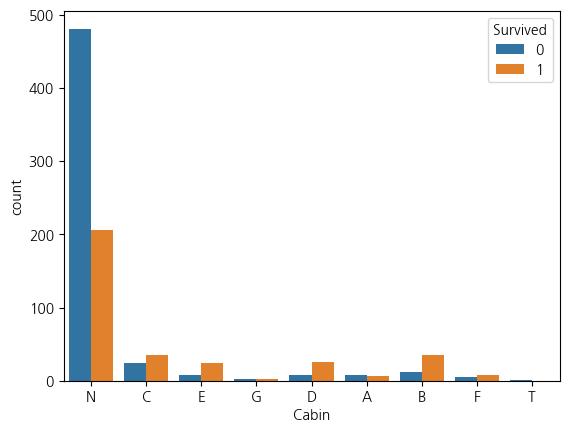

In [15]:
sns.countplot(x='Cabin',hue='Survived', data=df)

In [16]:
df.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
N         1             2
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [17]:
embarked_survived_count = df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack(fill_value=0)

# 각 embarked 별 전체 승객 수 계산
embarked_total_count = embarked_survived_count.sum(axis=1)

# 생존자 비율과 비생존자 비율 계산
embarked_survived_ratio = embarked_survived_count.div(embarked_total_count, axis=0)

print(embarked_survived_ratio)

Survived         0         1
Embarked                    
C         0.446429  0.553571
N         0.000000  1.000000
Q         0.610390  0.389610
S         0.663043  0.336957


<Axes: xlabel='Embarked', ylabel='count'>

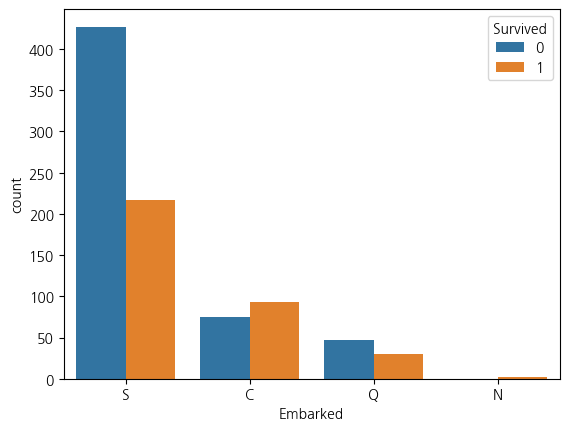

In [18]:
sns.countplot(x='Embarked',hue='Survived',data=df)

### 성별, 선실등급, 객실, 정착지에 따른 생존율 집계분포
- 남성의 경우, 577명 중 468 사망, 109 생존, 약 18.8% 의 생존율을 보임
- 여성의 경우, 314명 중 81 사망, 233 생존, 약 74.2% 의 생존율을 보임
- 선실 1등석의 경우, 62.9% 의 생존율을 보임
- 선실 2등석의 경우, 47.2% 의 생존율을 보임
- 선실 3등석의 경우, 24.2% 의 생존율을 보임
- 객실 번호 앞자리가 B(75%), C(60%), D(75%), E(75%) 그리고 결측치인 N(70%) 에서 각각의 생존율을 보임
- 정착지가 S(33%), C(55%), Q(39%) 에서 각각의 생존율을 보임

<Axes: xlabel='Pclass', ylabel='Survived'>

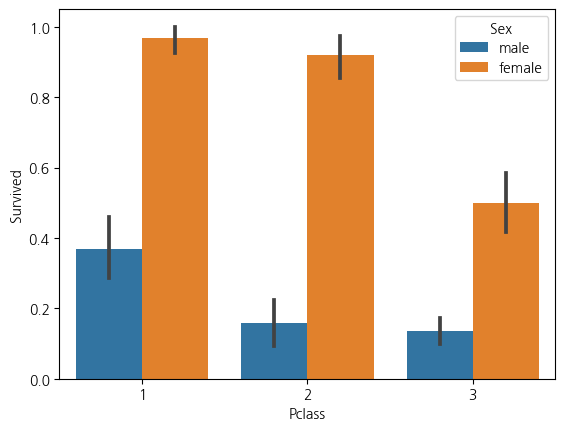

In [19]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=df)

선실 등급별 생존율의 분포가 단계적임을 알수있음을 확인하고 추가적으로 선실 등급 & 성별의 시각화 결과
- 여성의 경우 1, 2등석에 따른 생존 확률 차이는 크지 않으나 3등석의 경우 생존 확률이 상대적으로 떨어짐
- 남성의 경우 1등석의 생존 확률이 2, 3등석 생존 확률보다 월등히 높음

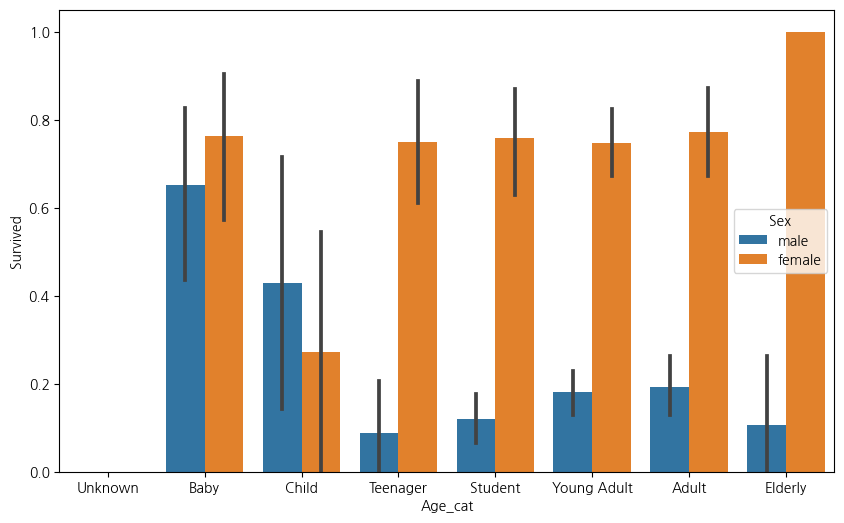

In [20]:
# age의 경우 값 종류가 많아 범위별로 카테고리를 할당하여 데이터 가공함
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat
plt.figure(figsize=(10,6)) # 그래프 크기 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=df,order=group_names)
df.drop('Age_cat',axis=1,inplace=True)

- 여자 baby 의 경우, 비교적 생존 확률이 높음
- 여자 child 의 경우, 다른 연령대에 비해 생존 확률이 낮음
- 여자 Elderly 의 경우, 생존 확률이 매우 높음

In [21]:
# 승객 아이디, 승객 이름, 승객의 티켓 아이디는 크게 생존률에 영향을 주지 않는다 판단하여 데이터 프레임에서 제거하고 분석을 계속 진행항
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,30.0,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


## 이상치 확인

- boxplot을 통해 이상치 또한 있는지 확인
- 그 결과 Age, Fare, SibSp, Parch에서 이상치 값을 보였으나 특히 눈에 띄게보이는 이상치는 Fare 열로, Fare 열에 300보다 큰 이상치는 제거함

<Axes: >

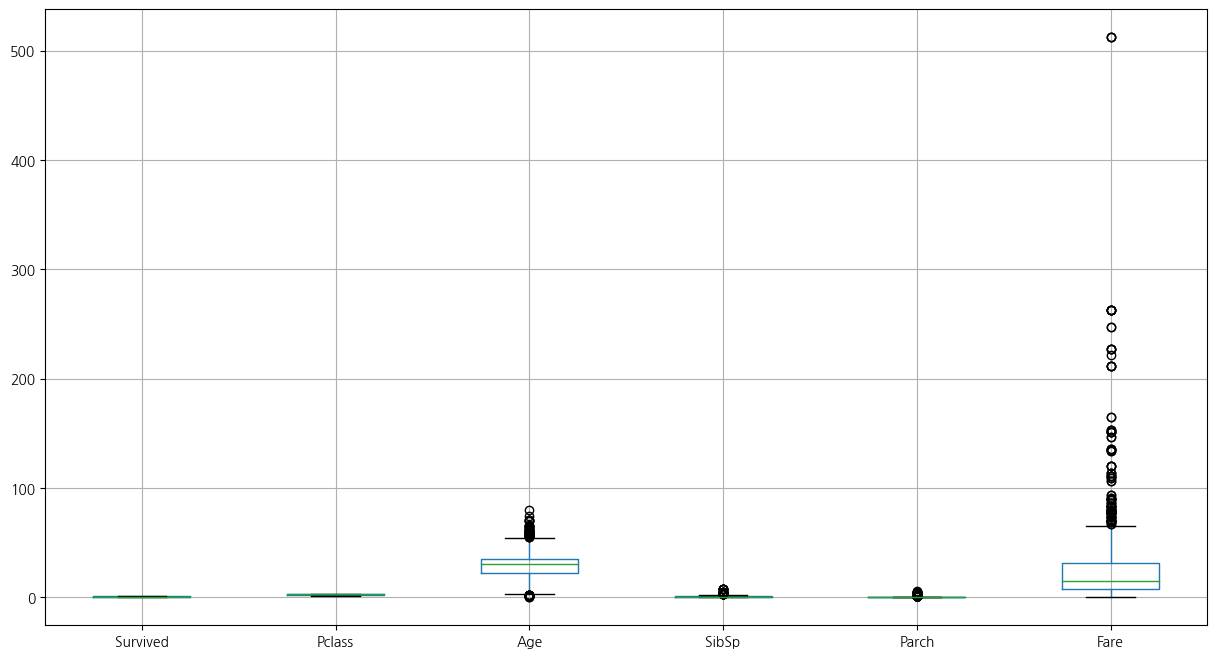

In [22]:
df.boxplot(figsize=(15,8))

In [23]:
# 티켓 가격에서 눈에 띄는 이상치가 발견되어 이상치를 제거해주고 다시 df로 넣는다.
df_rl = df[df["Fare"]<300]
df = df_rl
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,30.0,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


## 목표변수 및 설명변수의 분포 확인

#### 분석목표 : 생존률에 영향을 미치는 영향인자 도출

- 가설 1. 성별에 따라 생존율에 영향을 줄 것이다.
- 가설 2. 나이에 따라 생존율에 영향을 줄 것이다.
- 가설 3. 선실 등급별로 생존율에 영향을 줄 것이다.
- 가설 4. 객실에 따라 생존율에 영향을 줄 것이다.
- 가설 5. 정착지에 따라 생존율에 영향을 줄 것이다.

### 성별, 선실등급, 객실, 정착지에 따른 생존율 집계분포
- 남성의 경우, 577명 중 468 사망, 109 생존, 약 18.8% 의 생존율을 보임
- 여성의 경우, 314명 중 81 사망, 233 생존, 약 74.2% 의 생존율을 보임
- 선실 1등석의 경우, 62.9% 의 생존율을 보임
- 선실 2등석의 경우, 47.2% 의 생존율을 보임
- 선실 3등석의 경우, 24.2% 의 생존율을 보임
- 객실 번호 앞자리가 B(25%), C(40%), D(25%), E(25%) 그리고 결측치인 N(30%) 에서 각각의 생존율을 보임
- 정착지가 S(33%), C(55%), Q(39%) 에서 각각의 생존율을 보임

### 가설 1 : 성별은 생존에 영향을 주는 설명변수이다

<Axes: >

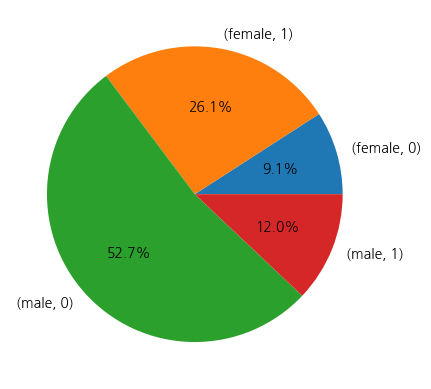

In [24]:
df_count = df.groupby(["Sex","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')

### 해석

원 그래프를 이용하여 구해본 결과, 남성(male)은 사망에 대한 지표가 사망을 의미하는 0에 더 많이 나타났고, 여성은 생존을 의미하는 1 이라는 생존 지표가 더 많이 나옴으로 인해
**여성이 남성보다 높은 생존율, 낮은 사망률을 알 수 있음.**

**즉, 성별은 생존에 영향을 주는 설명변수라 할 수 있다.**

### 가설 2 : 선실등급은 생존에 영향을 주는 설명변수이다

<Axes: xlabel='Pclass', ylabel='count'>

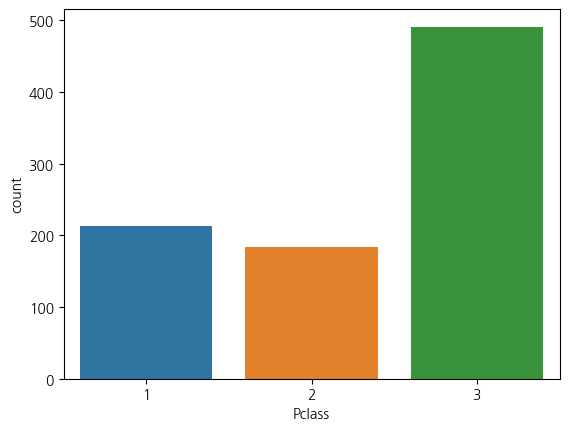

In [25]:
# Pclass(선실등급)의 종류와 개수 확인
sns.countplot(x='Pclass',data=df)

# 확인해 본 결과 3등급에 가장 많이 탔고, 1등급, 2등급 순으로 많이 탔음

<Axes: >

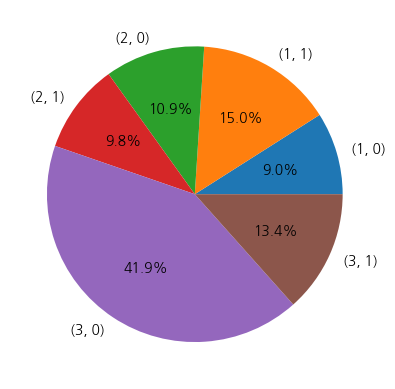

In [26]:
#파이 차트를 이용하여 먼저 Pclass 기준으로 자료 요약을 한다
df_count = df.groupby(["Pclass","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')

### 해석

**해당 자료를 분석해보면 먼저 선실 등급의 종류와 개수에 대한 차트를 보았을 때, 승객들이 3등급에 가장 많이 탔고, 1등급, 2등급 순으로 많이 탔음을 알 수 있었다.**

**또 파이차트를 분석해 보면 전체 생존률은 (15+9.8+13.4) = 38.2% 이다.**

**다음으로 각 등급에서의 생존률은 1등급은 15% , 2등급은 9.8%, 3등급은 13.4%로 1등급이 가장 높은 생존률을 가짐을 알 수 있다.**

또 각 등급 안에서의 생존률을 구해보면 

- 1등급 : 15/(15+9) = 0.625 : 약 62.5% 
- 2등급 : 9.8/(9.8+10.9) = 0.473 : 약 47.3% 
- 3등급 : 13.4 / (13.4 + 41.9) = 0.242 : 약 24.2% 

임을 알 수 있다.

**따라서 1등급에 탔을 때 가장 높은 생존율을 보이며, 2등급 - 3등급 순서대로 생존율이 높기 때문에 **선실등급은 생존에 영향을 주는 설명변수라고 할 수 있다.**

### 가설 3 : 나이는 생존에 영향을 주는 설명변수이다

In [27]:
import math
def age_range(age):
    return (age//10)*10

In [28]:
age_df = df
age_df["Age"] = age_df["Age"].apply(lambda x : age_range(x))
age_df.head()

C:\Users\winju\AppData\Local\Temp\ipykernel_7036\3784661443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df["Age"] = age_df["Age"].apply(lambda x : age_range(x))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,20.0,1,0,7.2500,N,S
1,1,1,female,30.0,1,0,71.2833,C,C
2,1,3,female,20.0,0,0,7.9250,N,S
3,1,1,female,30.0,1,0,53.1000,C,S
4,0,3,male,30.0,0,0,8.0500,N,S


<Axes: xlabel='Age', ylabel='count'>

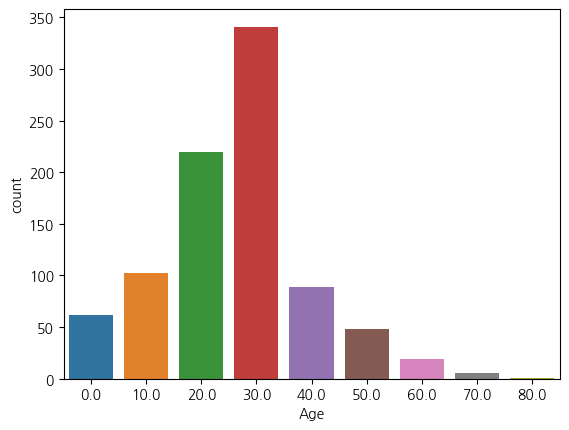

In [29]:
# 각 나이대별로 얼마나 승객이 존재하는지 알아보기 위한 차트
sns.countplot(x='Age',data=df)

C:\Users\winju\AppData\Local\Temp\ipykernel_7036\3015944102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_Group"] = df["Age"].apply(lambda x : age_to_age_group(x))


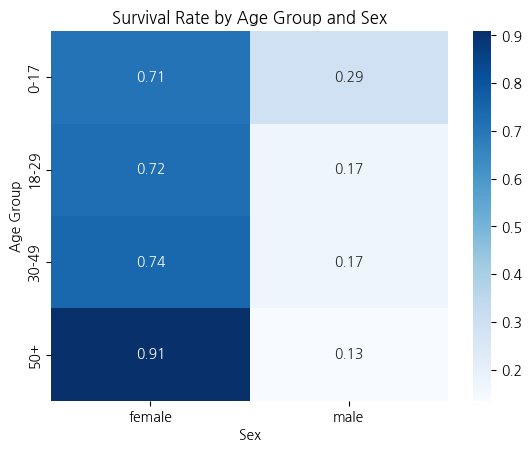

In [30]:
# 나이를 연령대로 변환하는 함수 정의
def age_to_age_group(age):
    if age < 18:
        return "0-17"
    elif 18 <= age < 30:
        return "18-29"
    elif 30 <= age < 50:
        return "30-49"
    else:
        return "50+"

# 연령대 열 추가
df["Age_Group"] = df["Age"].apply(lambda x : age_to_age_group(x))

# 연령대별 성별 생존율 평균 계산
df_agg = df.groupby(["Sex", "Age_Group"], as_index=False)["Survived"].mean()

# pivot_table()을 사용하여 데이터 피벗
df_pivot = df_agg.pivot_table(index="Age_Group", columns="Sex", values="Survived")

# Heatmap 그리기
sns.heatmap(df_pivot, cmap="Blues", annot=True, fmt=".2f")
plt.title("Survival Rate by Age Group and Sex")
plt.xlabel("Sex")
plt.ylabel("Age Group")
plt.show()

### 해석

**먼저 나의를 10단위로 하여 나누기 위해 함수를 이용하여 데이터 프레임을 수정하였다.**
**그 후에 Heatmap을 활용하여 분석해 보면 일단 x,y,z 값이 모두 필요하고,따라서 나는 x는 성별, y는 나이대, z는 생존 값 평균으로 지정하였다.**

- 해당 지표를 보면 다시한번 여성이 남성에 비해 더 많이 생존했음을 알 수 있고, 나이대 별로 봐도, 여성의 생존율이 남성의 생존율보다 높다.
- 즉, 10대 - 40대까지는 크게 생존율에 차이가 없지만, 유아나 어린이 그리고 가장 고령층인 승객들의 생존율이 다른 나이대에 비해 높은 비율을 띄기 때문에 나이가 생존에 영향을 주는 설명변수라고 할 수 있다.
- 결국 이것은 사람들이 어린아이와 노약자 즉, 사회적 약자의 생존을 도와주는 경향이 있다고 할 수 있다.

### 가설 4 : 객실은 생존에 영향을 주는 설명변수이다

<Axes: xlabel='Cabin', ylabel='count'>

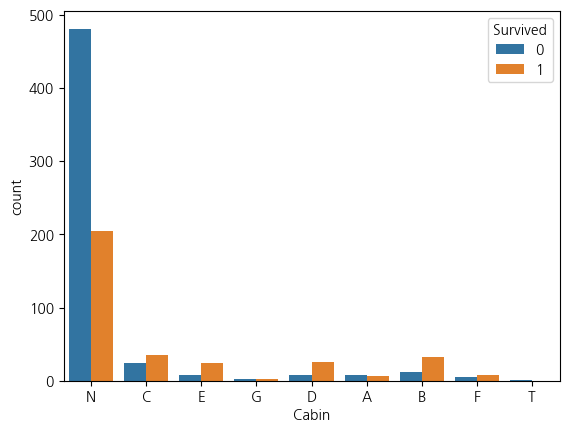

In [31]:
sns.countplot(x='Cabin',hue='Survived',data=df)

### 해석
객실의 종류와 생존자 분포는 위 그림과 같다

**각 객실에서의 생존률 높은 순서대로 D,E,B,F 등으로 나타나지만 객실별로 생존자의 빈도수 차이가 크지않으며
결측치 N 값에서 다수의 결과값이 드러난다는 점에서 객실 별로 차이는 있다고 할 수 없다.**

### 가설 5 : 승선장소는 생존에 영향을 주는 설명변수이다

<Axes: xlabel='Embarked', ylabel='count'>

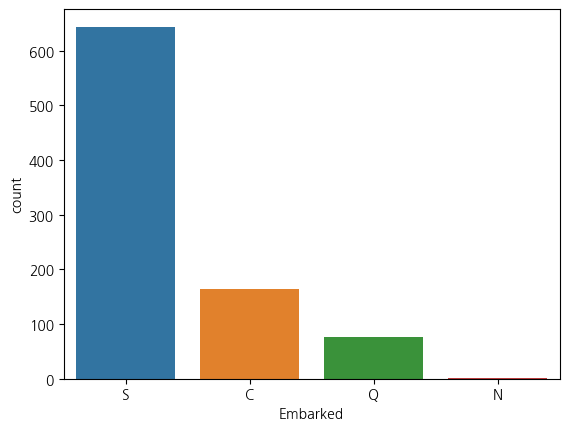

In [32]:
sns.countplot(x='Embarked',data=df)

<Axes: >

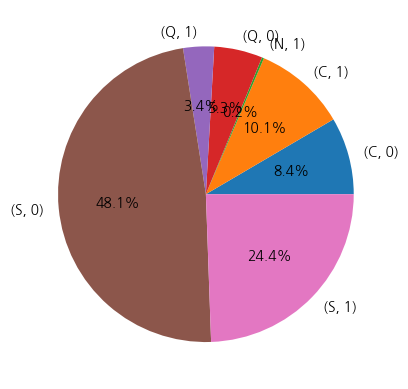

In [33]:
df_count = df.groupby(["Embarked","Survived"]).size()
df_count.plot.pie(y="Survived",autopct='%.1f%%')
 

### 해석

**먼저 승선장소의 종류와 승객들의 분포 정도를 확인해 보았더니 S-C-Q 순서대로 승객들이 많이 승선함을 확인하였다.**

**다음으로 각 등급에서의 생존률은 S는 24.7% , C는 10.1%, Q는 3.4%로 S 승선장소가 가장 높은 생존률을 가짐을 알 수 있다.**

또 각 승선장소 안에서의 생존률을 구해보면 

- S : 24.7/72.8 = 0.339 : 약 33.9% 
- C : 10.1/18.5 = 0.545 : 약 54.5% 
- Q : 3.4/ 8.7 = 0.390 : 약 39% 

임을 알 수 있다.

**즉, C 승선장소에서 가장 높은 생존율이 나왔고, 그 다음으로 Q 승선장소-S승선장소 순서대로 생존율을보였기 때문에, 승선장소는 생존에 영향을 주는 설명변수라고 할 수 있다**

**또한 S 승선장소에 승객이 가장 많이 존재했는데, 가장 낮은 생존율을 보이는 것으로 보아 S 승선장소가 조금 저렴한 장소이거나, 실제 사고가 났을때 바로 직접적으로 타격을 받은 장소일 수 있다고 짐작할 수 있다.**

## 결론

**앞서 분석한 내용을 바탕으로 타이타닉 호에서 승객의 생존율에는 성별, 나이, 선실등급, 객실, 승선장소의 요인이 생존에 영향을 주는 설명변수라고 할 수 있으며, 그 외에도 승객간의 관계 등의 또 다른 요인이 생존에 영향을 줄 수 있다는 점을 발견하였다.**
